In [2]:
# Import Libaries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns

In [3]:
# Import Operating System Command 

import os

In [4]:
# Creating data directory path 

data_dir = '/Users/mayowa/Documents/KaggleProject/images'

In [16]:
# Viewing the data_dir

os.listdir(data_dir)

['.DS_Store', 'seg_test', 'seg_train']

In [6]:
# create the train and test path

train_path = data_dir + '/seg_train/'
test_path = data_dir + '/seg_test/'

In [17]:
# Viewing the train folder

os.listdir(train_path)

['forest', 'buildings', 'glacier', 'street', 'mountain', 'sea']

### Forest Image

In [18]:
# viewing the forest image list

os.listdir(train_path + 'forest')[0]

'5109.jpg'

In [10]:
forest_image = train_path + 'forest/' + '5109.jpg'

In [11]:
forest_image

'/Users/mayowa/Documents/KaggleProject/images/seg_train/forest/5109.jpg'

In [12]:
# import image to voew the image 

from tensorflow.keras.preprocessing import image

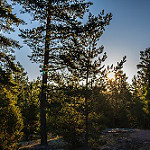

In [19]:
# loading the image

image.load_img(forest_image)

In [15]:
imread(forest_image).shape

(150, 150, 3)

### Building Image

In [26]:
os.listdir(train_path + 'buildings')[10]

'8363.jpg'

In [27]:
building_image = train_path + 'buildings/' + '8363.jpg'

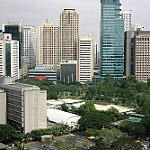

In [28]:
image.load_img(building_image)

In [29]:
imread(building_image).shape

(150, 150, 3)

### Glacier image

In [30]:
os.listdir(train_path + 'glacier')[10]

'17314.jpg'

In [31]:
glacier_image = train_path + 'glacier/' + '17314.jpg'

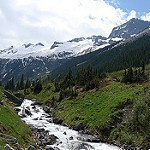

In [32]:
image.load_img(glacier_image)

In [79]:
imread(glacier_image)

array([[[213, 224, 244],
        [214, 225, 245],
        [215, 226, 246],
        ...,
        [133, 178, 220],
        [134, 177, 220],
        [134, 175, 227]],

       [[212, 223, 241],
        [213, 224, 242],
        [214, 225, 243],
        ...,
        [137, 175, 222],
        [136, 177, 223],
        [136, 176, 225]],

       [[212, 223, 241],
        [212, 223, 241],
        [213, 224, 242],
        ...,
        [139, 174, 228],
        [139, 175, 227],
        [138, 176, 223]],

       ...,

       [[ 89, 106,  64],
        [ 71,  85,  36],
        [102, 112,  62],
        ...,
        [ 10,   9,   4],
        [ 57,  57,  55],
        [ 24,  26,  25]],

       [[ 74,  92,  42],
        [ 84,  99,  44],
        [ 79,  92,  38],
        ...,
        [ 16,  15,  11],
        [  3,   3,   5],
        [  3,   4,   9]],

       [[ 63,  83,  22],
        [ 86, 102,  39],
        [ 88, 102,  40],
        ...,
        [  2,   1,   0],
        [ 87,  86,  94],
        [235, 237, 249]]

In [34]:
# looping through the image file

dim1 = []
dim2 = []

for image_filename in os.listdir(test_path + 'forest'):
    
    img = imread(test_path + 'forest/' + image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

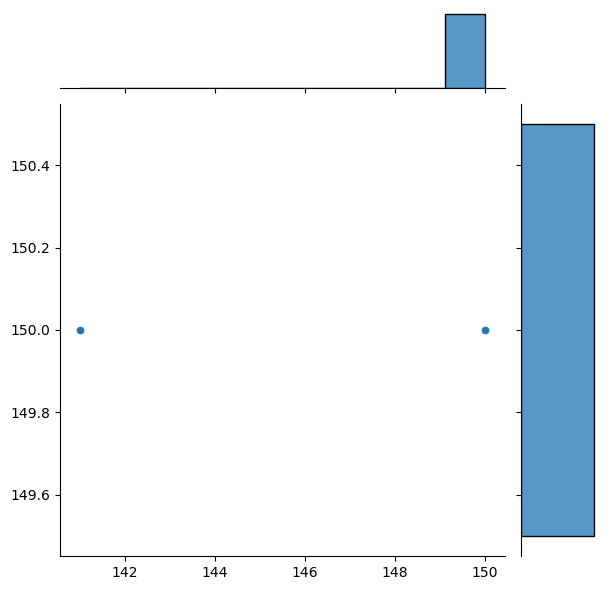

In [36]:
sns.jointplot(x = dim1, y = dim2)

In [50]:
image_shape = (150, 150, 3)

### Image Manipulation

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [122]:
image_gen = ImageDataGenerator(width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               shear_range = 0.1,
                               zoom_range = 0.1,
                               #horizontal_flip = True,
                               fill_mode = 'nearest',
                              rescale = 1.0/255)

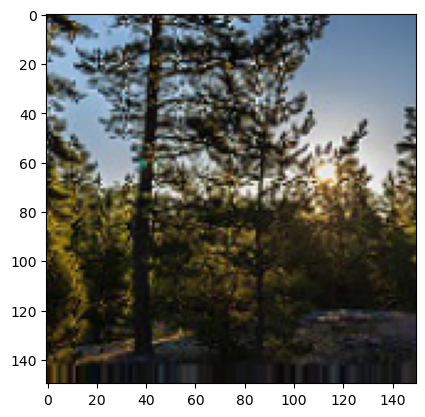

In [123]:
plt.imshow(image_gen.random_transform(imread(forest_image)))

### Set Up Directory Flow

In [124]:
batch_size = 30

In [125]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size = image_shape[:2],
                                                color_mode = 'rgb',
                                                batch_size = batch_size,
                                                class_mode = 'categorical')

Found 14034 images belonging to 6 classes.


In [126]:
# Checking the label of the dataset

train_image_gen.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [127]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size = image_shape[:2],
                                               color_mode = 'rgb',
                                               batch_size = batch_size,
                                               class_mode = 'categorical',
                                              shuffle = False)

Found 3000 images belonging to 6 classes.


In [128]:
# Checking the label of the dataset

test_image_gen.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [129]:
labels = {value: key for key, value in train_image_gen .class_indices.items()}

print("lable mappings for classes present in the training and test datasets \n")

for key, value in labels.items():
    print(f"{key} : {value}")

lable mappings for classes present in the training and test datasets 

0 : buildings
1 : forest
2 : glacier
3 : mountain
4 : sea
5 : street


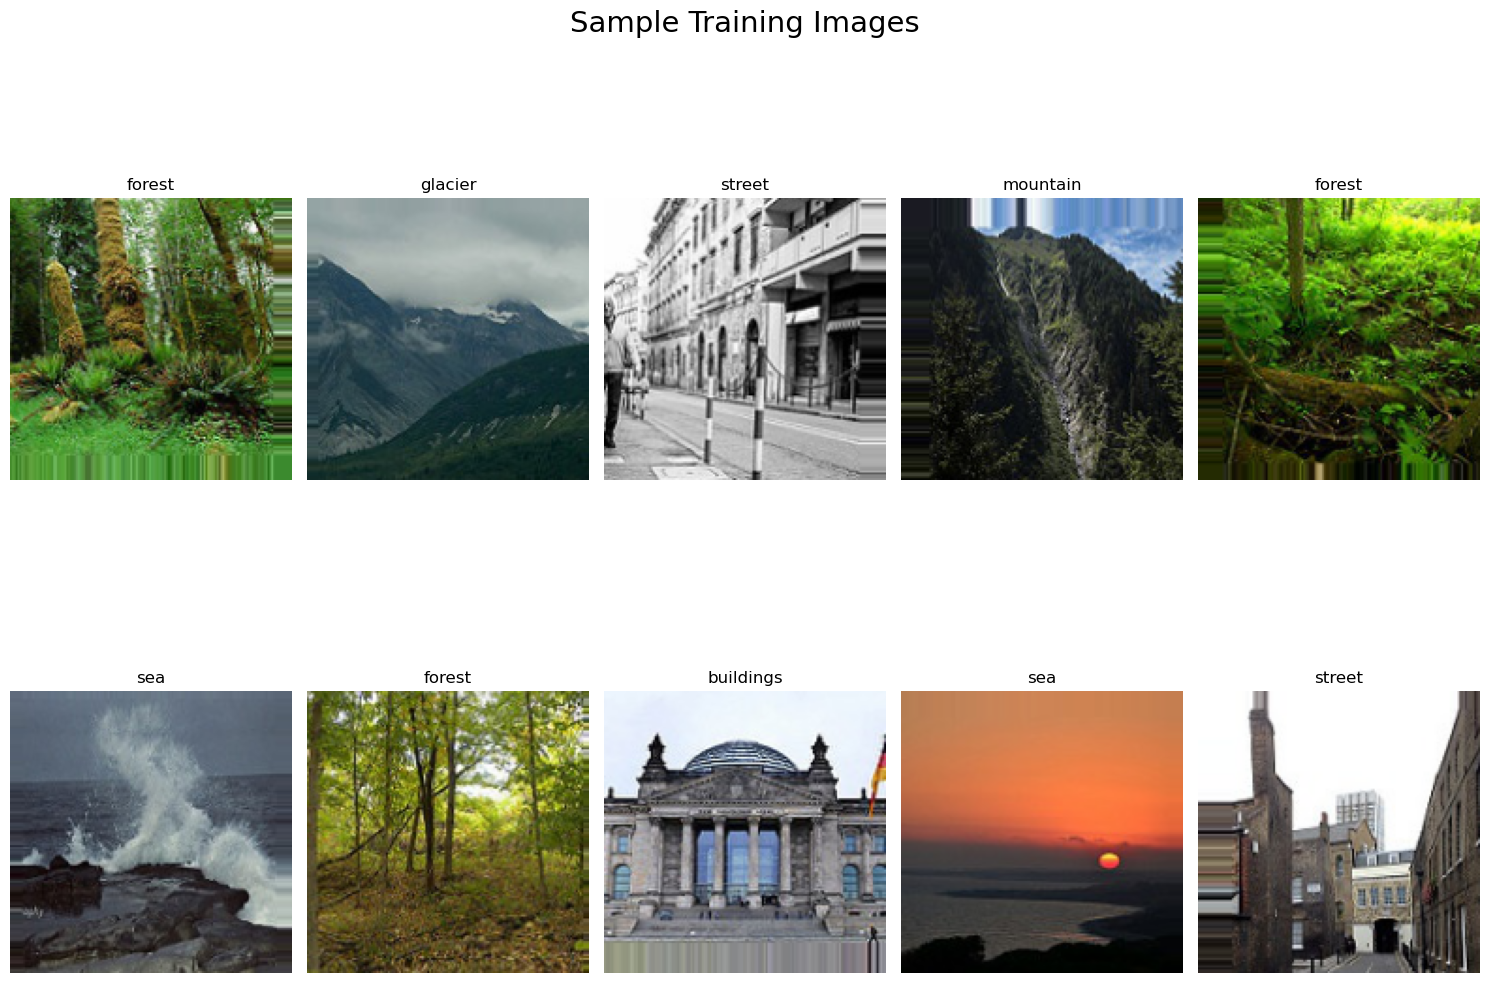

In [130]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15,12))
idx = 0

for i in range(2):
    for j in range(5):
        lable = labels[np.argmax(train_image_gen[0][1][idx])]
        ax[i,j].set_title(f"{lable}")
        ax[i, j].imshow(train_image_gen[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

### Build Model

In [150]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam 

In [133]:
ES = EarlyStopping(monitor = 'val_loss', patience = 5)

In [157]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

In [158]:
## optimizer
optimizer = Adam(learning_rate=0.001)

In [159]:
model2 = Sequential()

model2.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = image_shape, activation = 'relu'))
model2.add(MaxPool2D(pool_size = (2,2)))
model1.add(BatchNormalization())

model2.add(Conv2D(filters = 64, kernel_size = (3, 3), input_shape = image_shape, kernel_regularizer= l2(0.00005), activation = 'relu'))
model2.add(MaxPool2D(pool_size = (2,2)))
model2.add(BatchNormalization())

model2.add(Conv2D(filters = 64, kernel_size = (3, 3), input_shape = image_shape, kernel_regularizer= l2(0.00005), activation = 'relu'))
model2.add(MaxPool2D(pool_size = (2,2)))
model2.add(BatchNormalization())

model2.add(Flatten())

model2.add(Dense(256, activation = 'relu'))
model2.add(Dropout(0.5))

model2.add(Dense(6, activation = 'softmax'))

model2.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics =['accuracy'])

In [160]:
model2.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 36, 36, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 17, 17, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │     4,735,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,793,606 (18.29 MB)

 Trainable params: 4,793,350 (18.29 MB)

 Non-trainable params: 256 (1.00 KB)

In [162]:
model2.fit(train_image_gen, epochs = 50, validation_data = test_image_gen, callbacks = [reduce_lr])

Epoch 1/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 64s 135ms/step - accuracy: 0.4781 - loss: 3.6659 - val_accuracy: 0.4370 - val_loss: 1.5461 - learning_rate: 0.0010
Epoch 2/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 64s 136ms/step - accuracy: 0.6174 - loss: 1.1058 - val_accuracy: 0.6263 - val_loss: 1.3620 - learning_rate: 0.0010
Epoch 3/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 64s 135ms/step - accuracy: 0.6970 - loss: 0.8576 - val_accuracy: 0.6113 - val_loss: 1.6736 - learning_rate: 0.0010
Epoch 4/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 64s 136ms/step - accuracy: 0.7407 - loss: 0.7309 - val_accuracy: 0.6837 - val_loss: 0.9556 - learning_rate: 0.0010
Epoch 5/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 64s 136ms/step - accuracy: 0.7655 - loss: 0.6566 - val_accuracy: 0.6670 - val_loss: 1.1860 - learning_rate: 0.0010
Epoch 6/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 64s 135ms/step - accuracy: 0.7803 - loss: 0.6518 - val_accuracy: 0.7790 - val_loss: 0.6667 - learning_rate: 0.0010
Epoch 7/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 64s 135ms/step - accuracy: 0.7

In [163]:
metrics = pd.DataFrame(model2.history.history)

<Axes: >

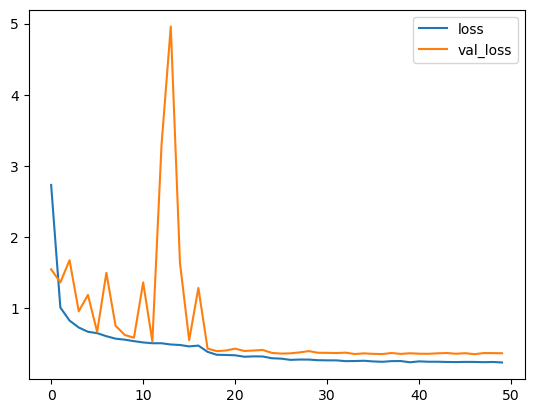

In [164]:
metrics[['loss', 'val_loss']].plot()

In [165]:
train_accuracy = model2.history.history['accuracy']
val_accuracy = model2.history.history['val_accuracy']

train_loss = model2.history.history['loss']
val_loss = model2.history.history['val_loss']

learning_rate = model2.history.history['learning_rate']

IndexError: index 2 is out of bounds for axis 0 with size 2

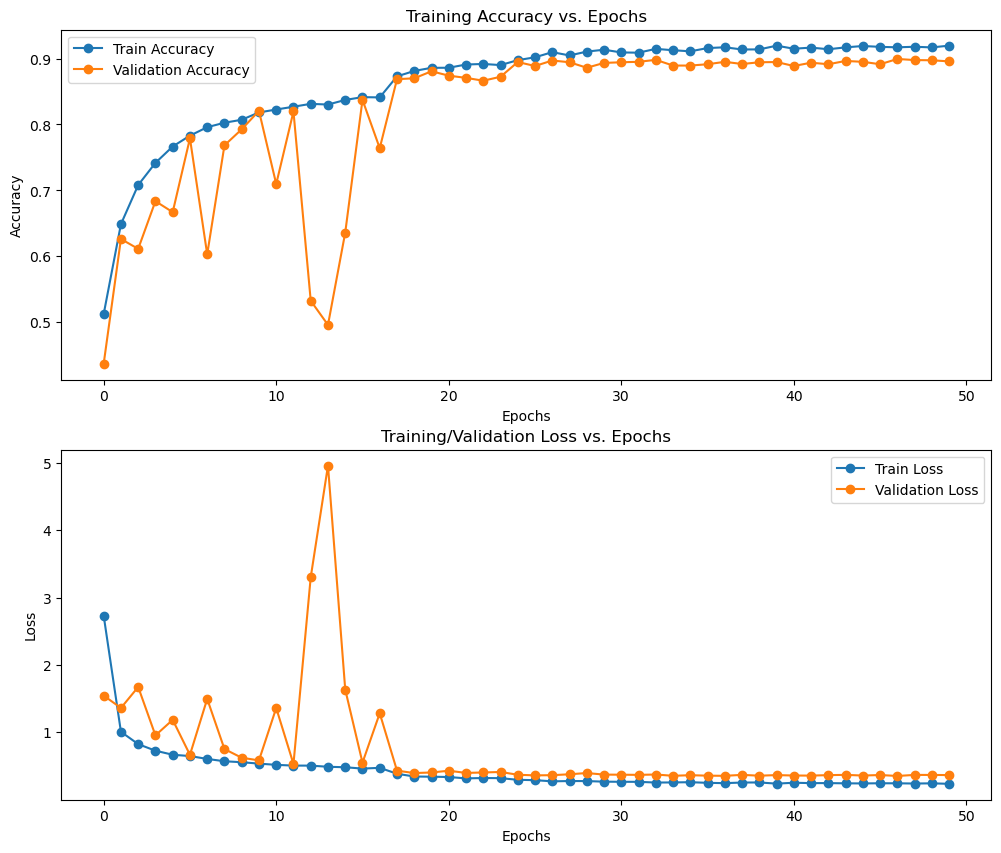

In [166]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

ax[2].set_title('Learning Rate vs. Epochs')
ax[2].plot(learning_rate, 'o-', label='Learning Rate')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

In [1]:
### Model Prediction 

In [167]:
pred = model2.predict(test_image_gen)

100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step


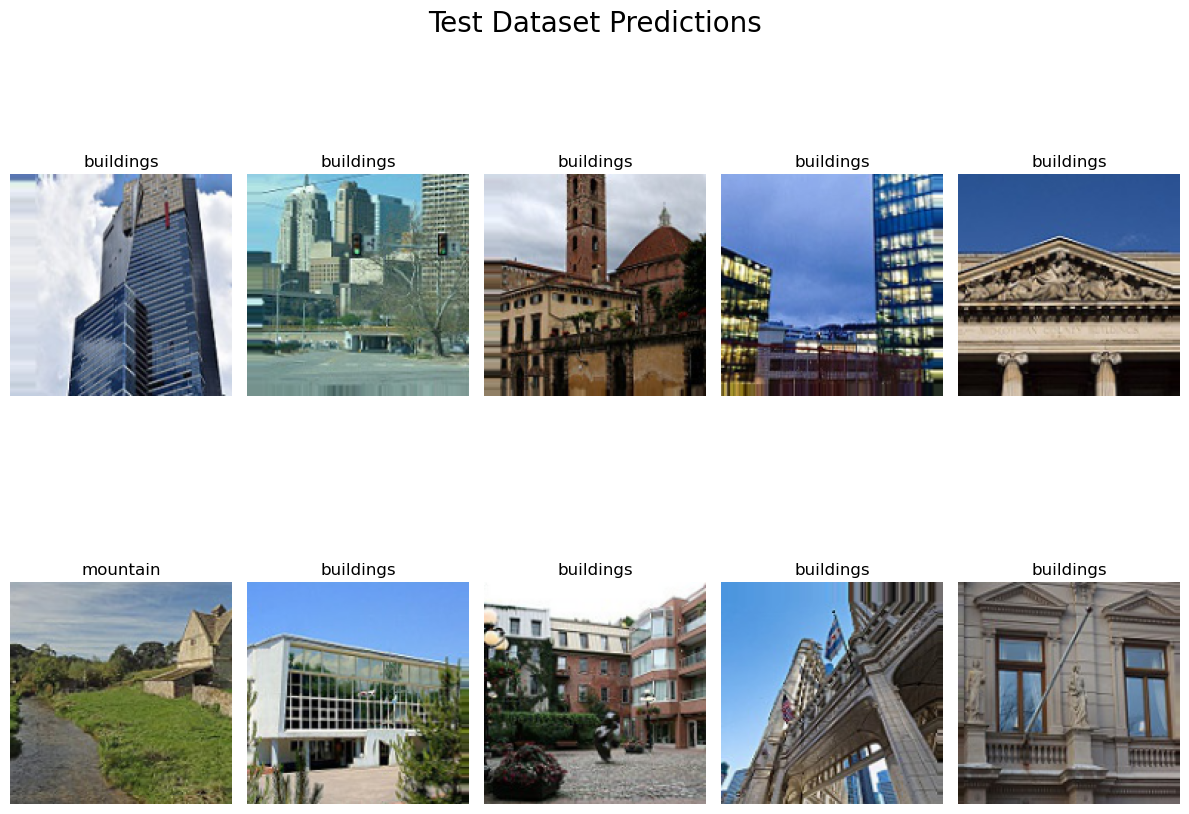

In [172]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels[np.argmax(pred[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_image_gen[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [168]:
model2.evaluate(test_image_gen, batch_size = batch_size)

100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - accuracy: 0.8932 - loss: 0.3632


[0.37088510394096375, 0.8896666765213013]

In [169]:
y_pred = np.argmax(pred, axis = 1)
y_true = test_image_gen.classes

In [170]:
from sklearn.metrics import classification_report

In [171]:
print(classification_report(y_true, y_pred, target_names = labels.values()))

              precision    recall  f1-score   support

   buildings       0.89      0.86      0.87       437
      forest       0.97      0.98      0.97       474
     glacier       0.86      0.84      0.85       553
    mountain       0.85      0.85      0.85       525
         sea       0.91      0.93      0.92       510
      street       0.89      0.90      0.89       501

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000



In [178]:
model2.save('NaturalModel.keras')

In [173]:
errors = (y_true - y_pred != 0)
y_true_errors = y_true[errors]
y_pred_errors = y_pred[errors]

In [175]:
test_images = test_image_gen.filenames
test_img = np.asarray(test_images)[errors]

NameError: name 'cv2' is not defined

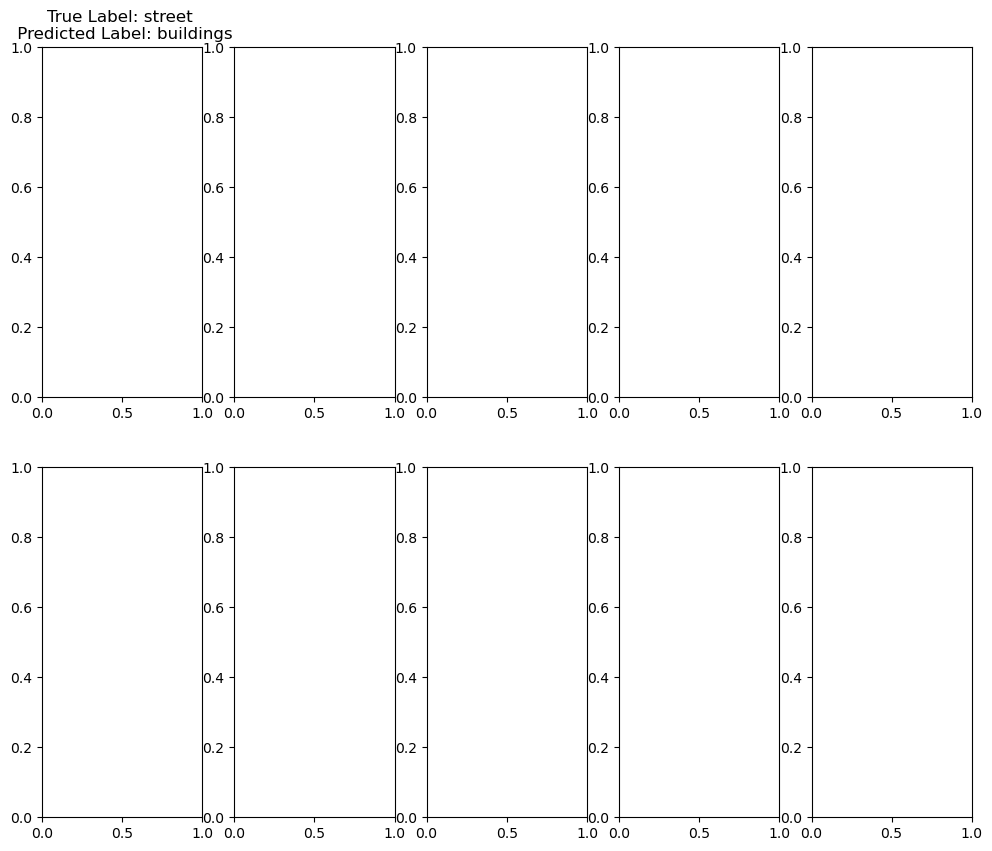

In [177]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(test_img))
        true_index = y_true_errors[idx]
        true_label = labels[true_index]
        predicted_index = y_pred_errors[idx]
        predicted_label = labels[predicted_index]
        ax[i, j].set_title(f"True Label: {true_label} \n Predicted Label: {predicted_label}")
        img_path = os.path.join(test_path, test_img[idx])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax[i, j].imshow(img)
        ax[i, j].axis("off")

plt.tight_layout()
plt.suptitle('Wrong Predictions made on test set', fontsize=20)
plt.show()